### From Curriculum minus examples please see https://ds.codeup.com/stats/correlation/

Correlation tests are used to check if two samples are related. They are often used for feature selection and multivariate analysis in data preprocessing and exploration.

### Pearson's Correlation Coefficient
The goal of this test is to answer the question: do two samples have a linear relationship?

To answer this question, we will take the following steps:

1. Calculate the Pearson correlation coefficient, rxy
2. Calculate the corresponding t-values
3. Test whether the t-values are significant or not

In this lesson, we will be looking at a dataset of student scores on an exam.

In [ ]:
#imports
#data load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt

from scipy import stats
from pydataset import data


In [5]:
df = data("mpg")
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Pre-Set Values
Before we perform the test, we will choose some values for our confidence interval and, based on that value, our alpha.

In [6]:
n = df.shape[0]
degf = n - 2
confidence_level = 0.95
alpha = 1 - confidence_level

When performing a correlation test, our null hypothesis is that there is no linear correlation between the two variables.

H0: There is no linear correlation between the number of hours studied and the score on the exam.

## Calculate Pearson Correlation Coefficient
The correlation coefficient, rxy is a unitless continuous numerical measure between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation.

We will calculate the correlation between hours studied and exam score.

            rxy=1n∑(xi−¯x)(yi−¯y)sxsy


**CORRELATION IS NOT CAUSATION**

**Pearson is just for linear correlation**

**One correlayion very likely does not tell the whole story**

**r does not idicate the scale**

In [17]:
# The math way
x = df.cty
y = df.hwy

def stdev(x):
    varience = ((x - x.mean()) ** 2).sum() / n
    return sqrt(varience)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy
# it may not make sense to correlate city milage and hwy milage but you didnt have access to the csv they used for the example

0.9559159136495723

In [ ]:
# the programming way

## Calculate the corresponding p-value
We can calculate a t-statistic for our correlation coefficient in order to inform us how likely it is that we observed this result due to chance. We will then use this t-statistic to find our p-value.

The t-value can be positive for positive correlations and negative for negative correlations, and is given by:

            t=rxy√n−2√1−r2xy 

Where n−2 is our degrees of freedom.

In [19]:
#calculate out t-statistic:
t = (r_xy * sqrt(n - 2) / sqrt(1 - r_xy **2))
t

49.58469791800595

Once we have our t-statistic, we can find our p-value by looking up the t-statistic in a t-table, or by using scipy's t distribution:

In [21]:
# calculate our p-value
p = stats.t.sf(t, df = degf) * 2
p

1.8683071952612543e-125

Lastly, we compare our p value to our alpha that we selected earlier:

In [22]:
# compare out p-value to our alpha
p < alpha

True

Since p is less than alpha, we reject our null hypothesis that there is no linear correlation between the number of hours studied and exam score.

Type Markdown and LaTeX: alpha^2

### The Easy Way
All of the work that we did above is also provided by scipy's `stats` module in it's `pearsonr` function.

In [26]:
#Instead of:
#def stdev(x):
    #varience = ((x - x.mean()) ** 2).sum() / n
    #return sqrt(varience)

#r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
#r_xy

corr, p = stats.pearsonr(x, y) #dont be afraid to use shift tab for more info
corr

0.9559159136495713

In [27]:
p

1.8683071952666785e-125

## Correlation Gotchas
When working with correlation, keep in mind:

1. Correlation is not causality.
2. Correlation measures linear relationship between the 2 variables. However, there may be other types of relationships, such as a quadratic or absolute value relationship.
3. Correlations can be misleading when confounding variables are ignored.
4. Correlation tells you nothing about how large the relationship is.


### Correlation is Not Causation
Correlation means that two variables are associated, but doesn't tell us whether one causes the other or not.

### Non-Linear Relationship
Here we'll look at an example of a non-linear relationship:

In [ ]:
# lets plot something that def does have correlation but is not linear

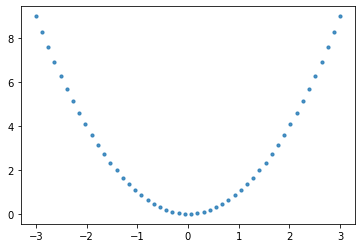

In [29]:
x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x,y, s = 10, alpha = 0.8)

In [32]:
r, p = stats.pearsonr(x, y)
r, p

(-1.3183898417423734e-16, 0.999999999999995)

In [33]:
#What is the pearson's r for this?
r

-1.3183898417423734e-16

In [34]:
#What is the pearson's p for this?
p

0.999999999999995

### Confounding Variables
We must be careful because correlation doesn't tell the whole story of a dataset. That is, correlation just looks at two variables in isolation, and doesn't account for any others. For example, a certain subgroup could have a strong correlation while another does not, or a third variable could be influencing both of the variables.

In our exam score data, if we look at coffee consumption and exam score, we see that they are strongly negatively correlated:



In [35]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

Text(8, 80, 'r = -0.766')

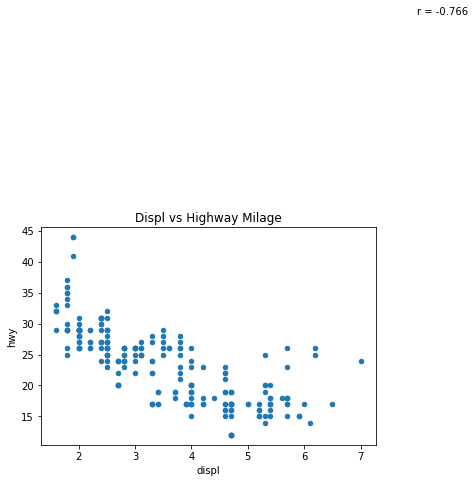

In [38]:
r, p = stats.pearsonr(df.displ, df.hwy)
df.plot.scatter('displ', 'hwy')
plt.title('Displ vs Highway Milage')
plt.text(8, 80, f'r = {r:.3f}')

However, it is probably the case that a third variable here has more influence, the number of hours that each student slept before the exam. We know that getting a good night's sleep improves exam scores, and if you don't get a good night's sleep, you are probably likely to drink more coffee.

In [41]:
r_displ, _ = stats.pearsonr(df.displ, df.hwy)
r_cty, _ = stats.pearsonr(df.cty, df.hwy)

print('Correlation between displ and hwy')
print(f'  r = {r_displ:.3f}')
print('Correlation between cty and hwy')
print(f'  r = {r_cty:.3f}')

Correlation between displ and hwy
  r = -0.766
Correlation between cty and hwy
  r = 0.956


### Scale of the Relationship
The correlation coefficient shows us how linearly correlated two variables are, but doesn't tell us the scale. That is one variable could increase/decrease in lock step with another, but the size of the change could be tiny.

Imagine our data was a little different and we tracked several student's coffee intake before an exam. The coffee consumption could be perfectly correlated with exam score, but to such a small amount that it doesn't matter.